# Trabalho Antonio Castro

## Coffee Quality EDA

<a id='table_of_contents'></a>

## Index

[1. Introduction](#q1)

[2. Data Analisys](#q2)
    
   [2.1 Classification of Variables](#q2.1)

[3. Correlation Analisys](#q3)

[4. Clusters (se der tempo)](#q4)

[5. Conclusion](#q5)









## 1. Introduction <a id='q1'></a>



        As the final assigment for the class of Introduction to Data Science, I choose a coffee related dataset, to help me getting into this assigment I pretended I am a coffee related company and searching for new coffee in various parts of the world. Using The CQI - Coffee Quality Institute Dataset to research and create a ML model for classificating the beans in different cattegories. 
    
        By the end of this report, we should not only have an understanding of how our coffee beans are rated and how we can group them, but also a way to explain our findings and what could be done with them by the management of the company

        We will begin by getting to know the provided data. To accomplish that, we will start by doing a  analysis of our features. As we encounter problems, such as missing values or outliers, we will make sure to apply different methods to solve them. 
    
        Completing those steps will hopefully guide us to a clean dataframe, that we can use to apply the clustering techniques we find to be adequate. We will make sure to visualize our results, plotting the necessary representations. We will also analyse them closely, both from theoretical and practical points of view. 

        Because the first steps will lead us to removing some of the rows present in our dataset, we will have to make decisions re-introducing (or not) to our dataset. It is important to really give thought to this step, as it might produce big changes in our final results.

        Finally, we will reflect on all of our findings, and on how we will deport our knowledge to the company management.


## 2. Data Analisys <a id='q2'></a>


        In this first space I will try to understand, analyze, and improve the provided data. By the end, we should have a new and clean database, ready to be used for further analysis.

### 2.1 Getting to know the data 
<a id='q2.1'></a>

In [173]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [174]:
df = pd.read_csv('arabica_data_cleaned.csv', index_col = 0, encoding='unicode-escape')
df.head(5)

,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,NaN,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [175]:
#numero de rows e columns
nRow, nCol = df.shape
print(f'{nRow} rows {nCol} columns') 

1311 rows 43 columns


In [176]:
df.info() #Check colluns and types

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1311 entries, 1 to 1312
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Species                1311 non-null   object 
 1   Owner                  1304 non-null   object 
 2   Country.of.Origin      1310 non-null   object 
 3   Farm.Name              955 non-null    object 
 4   Lot.Number             270 non-null    object 
 5   Mill                   1001 non-null   object 
 6   ICO.Number             1165 non-null   object 
 7   Company                1102 non-null   object 
 8   Altitude               1088 non-null   object 
 9   Region                 1254 non-null   object 
 10  Producer               1081 non-null   object 
 11  Number.of.Bags         1311 non-null   int64  
 12  Bag.Weight             1311 non-null   object 
 13  In.Country.Partner     1311 non-null   object 
 14  Harvest.Year           1264 non-null   object 
 15  Grad

### 2.1 Classfication of the Variables 

        We can see we have 43 variables ranging from location, companies, indentification and rates for flavor, aroma and tasting. Using these variables we can categorize them in a couple of categories:
        
        We can also spot some mistakes and redundancies such as altitude being measires twice.

        Categorical: Nominal:
            
            -  Species
            -  Country.of.Origin
            -  Altitude
            -  Region
            -  Harvest.Year
            -  Processing.Method
            
            
        Numerical: 
            - Aroma
            - Flavor
            - Aftertaste
            - Acidity
            - Body
            - Balance
            - Uniformity
            - Clean.Cup
            - Swetness
            - Cupper.Points
            - Total.Cup.Points
            - Moisture
            - Category One Defects
            

## 2.3  Data Wrangling


Let's drop some variables that doesn't seen to be very valuable for us right now:

In [177]:
df = df.drop(['Owner'], axis= 1)
df = df.drop(['Farm.Name'], axis= 1)
df = df.drop(['ICO.Number'], axis= 1)
df = df.drop(['Number.of.Bags'], axis= 1)
df = df.drop(['Expiration'], axis= 1)
df = df.drop(['Certification.Address'], axis= 1)
df = df.drop(['Certification.Contact'], axis= 1)
df = df.drop(['Bag.Weight'], axis= 1)
df = df.drop(['Altitude'], axis= 1)

df.head()

,Species,Country.of.Origin,Lot.Number,Mill,Company,Region,Producer,In.Country.Partner,Harvest.Year,Grading.Date,...,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,Certification.Body,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
1,Arabica,Ethiopia,NaN,metad plc,metad agricultural developmet plc,guji-hambela,METAD PLC,METAD Agricultural Development plc,2014,"April 4th, 2015",...,0.12,0,0.0,Green,0,METAD Agricultural Development plc,m,1950.0,2200.0,2075.0
2,Arabica,Ethiopia,NaN,metad plc,metad agricultural developmet plc,guji-hambela,METAD PLC,METAD Agricultural Development plc,2014,"April 4th, 2015",...,0.12,0,0.0,Green,1,METAD Agricultural Development plc,m,1950.0,2200.0,2075.0
3,Arabica,Guatemala,NaN,NaN,NaN,NaN,NaN,Specialty Coffee Association,NaN,"May 31st, 2010",...,0.00,0,0.0,NaN,0,Specialty Coffee Association,m,1600.0,1800.0,1700.0
4,Arabica,Ethiopia,NaN,wolensu,yidnekachew debessa coffee plantation,oromia,Yidnekachew Dabessa Coffee Plantation,METAD Agricultural Development plc,2014,"March 26th, 2015",...,0.11,0,0.0,Green,2,METAD Agricultural Development plc,m,1800.0,2200.0,2000.0
5,Arabica,Ethiopia,NaN,metad plc,metad agricultural developmet plc,guji-hambela,METAD PLC,METAD Agricultural Development plc,2014,"April 4th, 2015",...,0.12,0,0.0,Green,2,METAD Agricultural Development plc,m,1950.0,2200.0,2075.0


        Now let's check how many pieces of informationa are missing from the dataset and what variables we may have to drop

In [178]:
df.isna().sum() #check nan values

Species                    0
Country.of.Origin          1
Lot.Number              1041
Mill                     310
Company                  209
Region                    57
Producer                 230
In.Country.Partner         0
Harvest.Year              47
Grading.Date               0
Owner.1                    7
Variety                  201
Processing.Method        152
Aroma                      0
Flavor                     0
Aftertaste                 0
Acidity                    0
Body                       0
Balance                    0
Uniformity                 0
Clean.Cup                  0
Sweetness                  0
Cupper.Points              0
Total.Cup.Points           0
Moisture                   0
Category.One.Defects       0
Quakers                    1
Color                    216
Category.Two.Defects       0
Certification.Body         0
unit_of_measurement        0
altitude_low_meters      227
altitude_high_meters     227
altitude_mean_meters     227
dtype: int64

        We can see we have too many NaN values in the Lot.Number and Mill Variables, So we drop those also.

In [179]:
df = df.drop(['Lot.Number'], axis= 1)
df = df.drop(['Mill'], axis= 1)

In [180]:
df.describe() 

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
count,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.00000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1310.000000,1311.000000,1084.000000,1084.000000,1084.000000
mean,7.563806,7.518070,7.397696,7.533112,7.517727,7.517506,9.833394,9.83312,9.903272,7.497864,82.115927,0.088863,0.426392,0.177099,3.591915,1759.548954,1808.843803,1784.196379
std,0.378666,0.399979,0.405119,0.381599,0.359213,0.406316,0.559343,0.77135,0.530832,0.474610,3.515761,0.047957,1.832415,0.840583,5.350371,8767.847252,8767.187498,8767.016913
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.00000,10.000000,7.250000,81.170000,0.090000,0.000000,0.000000,0.000000,1100.000000,1100.000000,1100.000000
50%,7.580000,7.580000,7.420000,7.500000,7.500000,7.500000,10.000000,10.00000,10.000000,7.500000,82.500000,0.110000,0.000000,0.000000,2.000000,1310.640000,1350.000000,1310.640000
75%,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.00000,10.000000,7.750000,83.670000,0.120000,0.000000,0.000000,4.000000,1600.000000,1650.000000,1600.000000
max,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.00000,10.000000,10.000000,90.580000,0.280000,31.000000,11.000000,55.000000,190164.000000,190164.000000,190164.000000


        Just a simple look at our variables we cas see some distortion on the numbers such as lot of zeros, what means we have a lot of empty spots or outliars.
    
    We can also see the max on the altitude is 190164 meters, which is not feasible. 

        Let's take a look to what is stored in some of these variables and if we can detect some outliars or mistakes, starting by the altitude

In [181]:
print(df['unit_of_measurement'].unique())

['m' 'ft']


        We have some values also in FT, what maybe indicates the deformation in the data percentile. We will deal with these issues in a moment, let's check what else we can find.
        
        (I tried runnig a loop for all colluns but that led me too so much information at the same time it just was too hard to digest, let's run the relevant variables one by one to see what we have.)
      

In [182]:
print(df['Species'].unique())
print(df['Country.of.Origin'].unique())

['Arabica']
['Ethiopia' 'Guatemala' 'Brazil' 'Peru' 'United States'
 'United States (Hawaii)' 'Indonesia' 'China' 'Costa Rica' 'Mexico'
 'Uganda' 'Honduras' 'Taiwan' 'Nicaragua' 'Tanzania, United Republic Of'
 'Kenya' 'Thailand' 'Colombia' 'Panama' 'Papua New Guinea' 'El Salvador'
 'Japan' 'Ecuador' 'United States (Puerto Rico)' 'Haiti' 'Burundi'
 'Vietnam' 'Philippines' 'Rwanda' 'Malawi' 'Laos' 'Zambia' 'Myanmar'
 'Mauritius' 'Cote d?Ivoire' nan 'India']


        We have 100% arabica (as expected) and doesn't seem to have any mistakes in the country of origin Variable.

In [183]:
print(df['Category.One.Defects'].unique())
print(df['Category.Two.Defects'].unique())
print(df['Quakers'].unique())

[ 0  1  2  4  3  6 10  5 31 11 12  7 23 15  9  8]
[ 0  1  2  4  8  3  9  7  6 18  5 15 10 29 16 13 40 26 32 11 21 14 12 20
 17 23 22 19 30 34 45 38 47 31 28 27 24 55]
[ 0.  1.  4.  2.  5.  6.  3. 11.  7. nan  9.  8.]


        Hmm, ok, Some explanation about Category one and two defects: 
        
          Category One defects are like small stones or stickes, insect damage, full black beans etc
          
          Category Two are large stones or sticks, water damage, floater beans etc.
          
          Quackers are a type of beans that doens't roast well, it stays lighly colored because of a deficiency in sugar, but that's a defect you will only know after roasting. 
          
          We have lots of Cat 2 Defects in some of the coffee let's see how it will affect our model later.

## 2.4 Exploratory Analisys

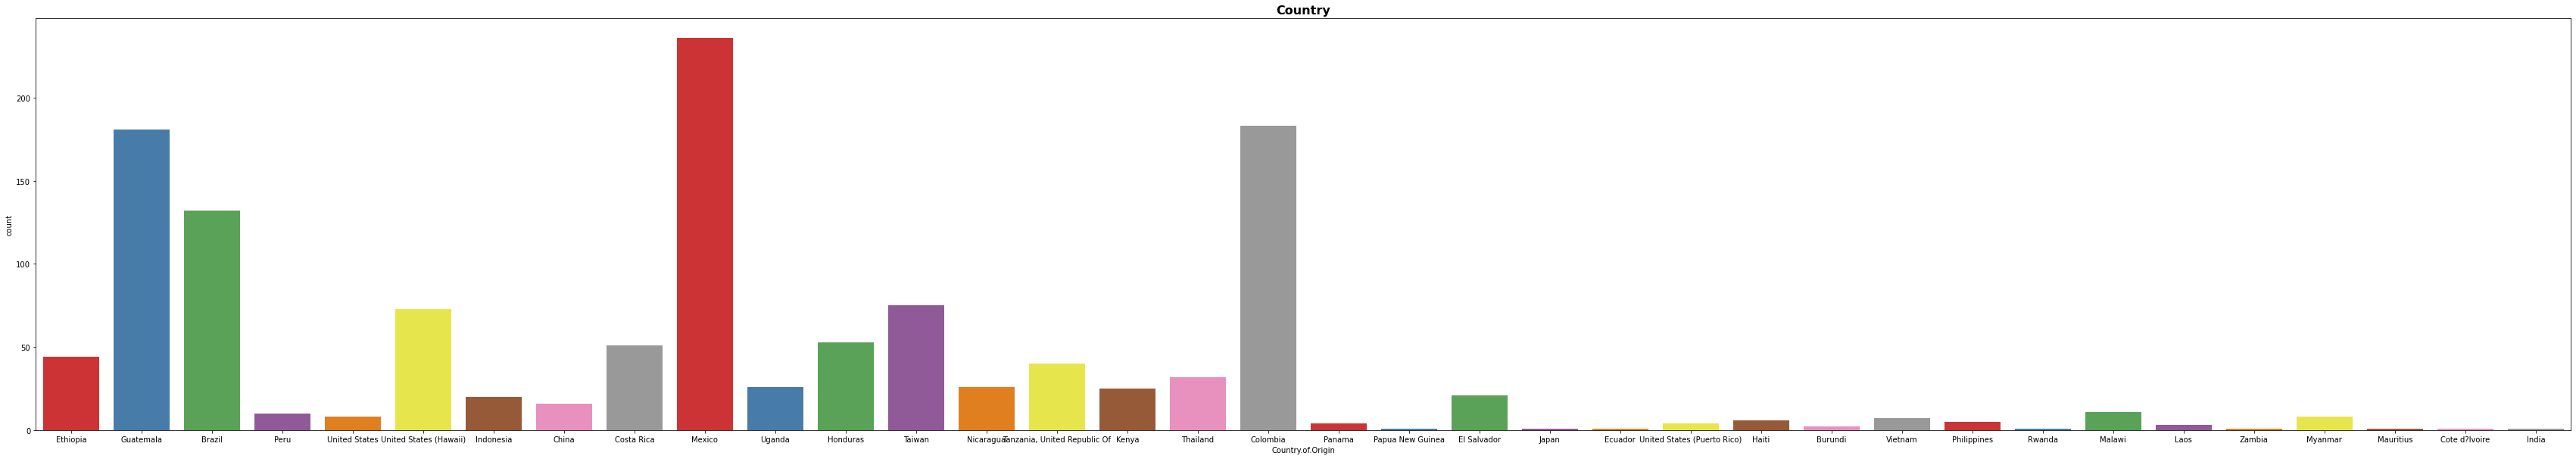

In [184]:
plt.figure(figsize=(60,10))
sns.countplot(df['Country.of.Origin'], palette="Set1")
plt.title("Country",fontsize=16,fontweight="bold")
plt.show()

           We can see most of our coffee comes from mexico, something I dind't expect! Guatemala and colombia also apear more frequently as expected, and we have some small quantities even from japan

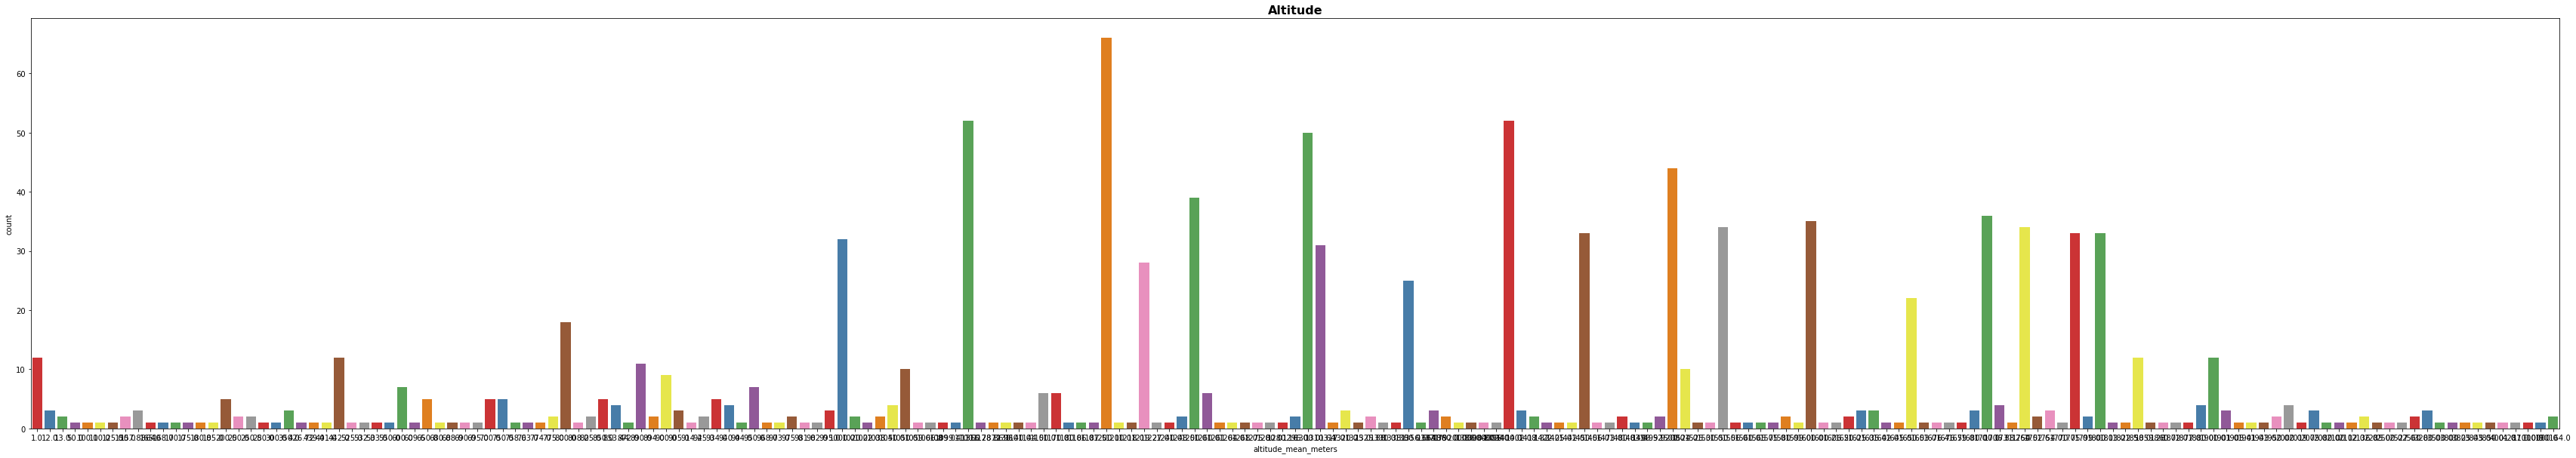

In [185]:
plt.figure(figsize=(60,10))
sns.countplot(df['altitude_mean_meters'], palette="Set1")
plt.title("Altitude",fontsize=16,fontweight="bold")
plt.show()

        Well... That doens't give us a lot of information, besides most crops are at sea level, let't see how we can sort get more relevant information about the altitude     

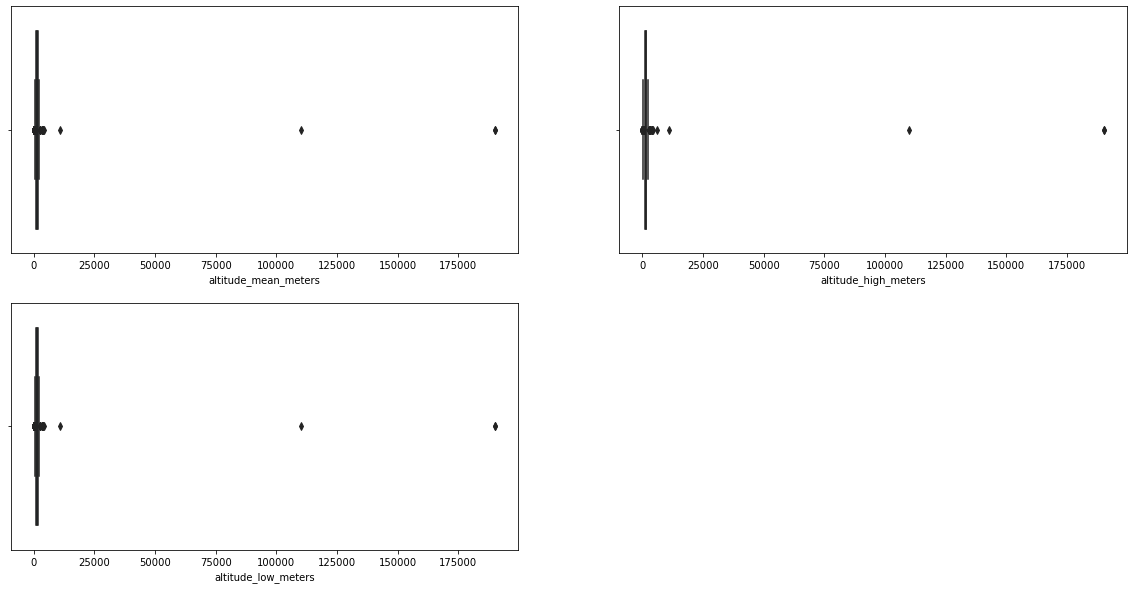

In [186]:
fig = plt.figure(figsize=(20,10))

grid = plt.GridSpec(ncols=2, nrows=2)
ax1 = fig.add_subplot(grid[0, 0,])
ax2 = fig.add_subplot(grid[0, 1,])
ax3 = fig.add_subplot(grid[1, 0,])

sns.boxplot(x='altitude_mean_meters', data=df, whis = 1.5, color= '#154360',ax= ax1)
sns.boxplot(x='altitude_high_meters', data=df, whis = 1.5, color= '#154360',ax= ax2)
sns.boxplot(x='altitude_low_meters', data=df, whis = 1.5, color= '#154360',ax= ax3)

        We have some outliers, as an altitude around 200000 meters would be like planting coffee on the moon these are most likely digitation mistakers or computational errors.

In [188]:
df.drop([])

,Species,Country.of.Origin,Company,Region,Producer,In.Country.Partner,Harvest.Year,Grading.Date,Owner.1,Variety,...,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,Certification.Body,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
1,Arabica,Ethiopia,metad agricultural developmet plc,guji-hambela,METAD PLC,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,NaN,...,0.12,0,0.0,Green,0,METAD Agricultural Development plc,m,1950.00,2200.00,2075.00
2,Arabica,Ethiopia,metad agricultural developmet plc,guji-hambela,METAD PLC,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,...,0.12,0,0.0,Green,1,METAD Agricultural Development plc,m,1950.00,2200.00,2075.00
3,Arabica,Guatemala,NaN,NaN,NaN,Specialty Coffee Association,NaN,"May 31st, 2010",Grounds for Health Admin,Bourbon,...,0.00,0,0.0,NaN,0,Specialty Coffee Association,m,1600.00,1800.00,1700.00
4,Arabica,Ethiopia,yidnekachew debessa coffee plantation,oromia,Yidnekachew Dabessa Coffee Plantation,METAD Agricultural Development plc,2014,"March 26th, 2015",Yidnekachew Dabessa,NaN,...,0.11,0,0.0,Green,2,METAD Agricultural Development plc,m,1800.00,2200.00,2000.00
5,Arabica,Ethiopia,metad agricultural developmet plc,guji-hambela,METAD PLC,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,...,0.12,0,0.0,Green,2,METAD Agricultural Development plc,m,1950.00,2200.00,2075.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,Arabica,Mexico,terra mia,juchique de ferrer,JUAN CARLOS GARCÃA LOPEZ,AMECAFE,2012,"September 17th, 2012",JUAN CARLOS GARCIA LOPEZ,Bourbon,...,0.11,0,0.0,None,20,AMECAFE,m,900.00,900.00,900.00
1308,Arabica,Haiti,haiti coffee,"department d'artibonite , haiti",COEB Koperativ Ekselsyo Basen,Specialty Coffee Association,2012,"May 24th, 2012",Myriam Kaplan-Pasternak,Typica,...,0.14,8,0.0,Blue-Green,16,Specialty Coffee Association,m,350.00,350.00,350.00
1309,Arabica,Nicaragua,exportadora atlantic s.a,jalapa,TeÃ³filo NarvÃ¡ez,Instituto HondureÃ±o del CafÃ©,2016,"June 6th, 2017","Exportadora Atlantic, S.A.",Caturra,...,0.13,1,0.0,Green,5,Instituto HondureÃ±o del CafÃ©,m,1100.00,1100.00,1100.00
1310,Arabica,Guatemala,unicafe,nuevo oriente,WILLIAM ESTUARDO MARTINEZ PACHECO,Asociacion Nacional Del CafÃ©,2012,"May 24th, 2012",Juan Luis Alvarado Romero,Catuai,...,0.10,0,0.0,Green,4,Asociacion Nacional Del CafÃ©,ft,1417.32,1417.32,1417.32


Let's Take a look on the Processing methods for all these crops:

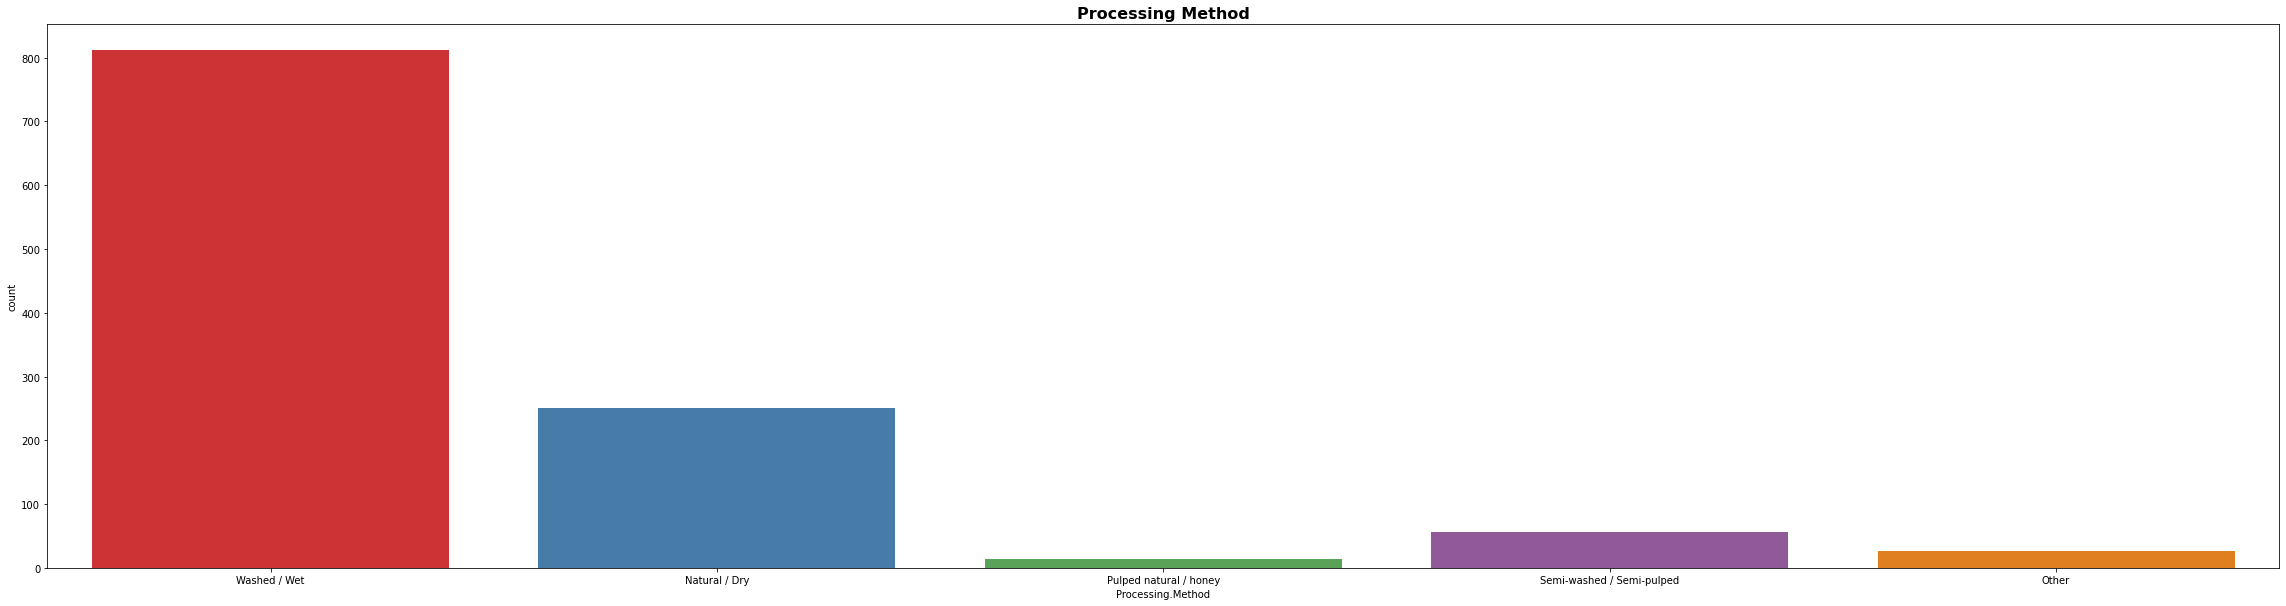

In [189]:
plt.figure(figsize=(40,10))
sns.countplot(df['Processing.Method'], palette="Set1")
plt.title("Processing Method",fontsize=16,fontweight="bold")
plt.show()

As expected the most commom (and fastest) way of processing is washing the beans, that means we have a lot of industrial grade coffee on our dataset.

Let's take a look on what we can find when looking to our tasting marks

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1311 entries, 1 to 1312
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Species               1311 non-null   object 
 1   Country.of.Origin     1310 non-null   object 
 2   Company               1102 non-null   object 
 3   Region                1254 non-null   object 
 4   Producer              1081 non-null   object 
 5   In.Country.Partner    1311 non-null   object 
 6   Harvest.Year          1264 non-null   object 
 7   Grading.Date          1311 non-null   object 
 8   Owner.1               1304 non-null   object 
 9   Variety               1110 non-null   object 
 10  Processing.Method     1159 non-null   object 
 11  Aroma                 1311 non-null   float64
 12  Flavor                1311 non-null   float64
 13  Aftertaste            1311 non-null   float64
 14  Acidity               1311 non-null   float64
 15  Body                 

So, our tasting variables are graded valuas, from 0 to 100 based on different Characteristics

    We have:
    
        - Aroma
        - Flavor
        - Aftertaste
        - Acidity
        - Body
        - Balance
        - Uniformity
        - Clean Cup
        - Sweetness
        - Cupper points
        - Total Cup Points

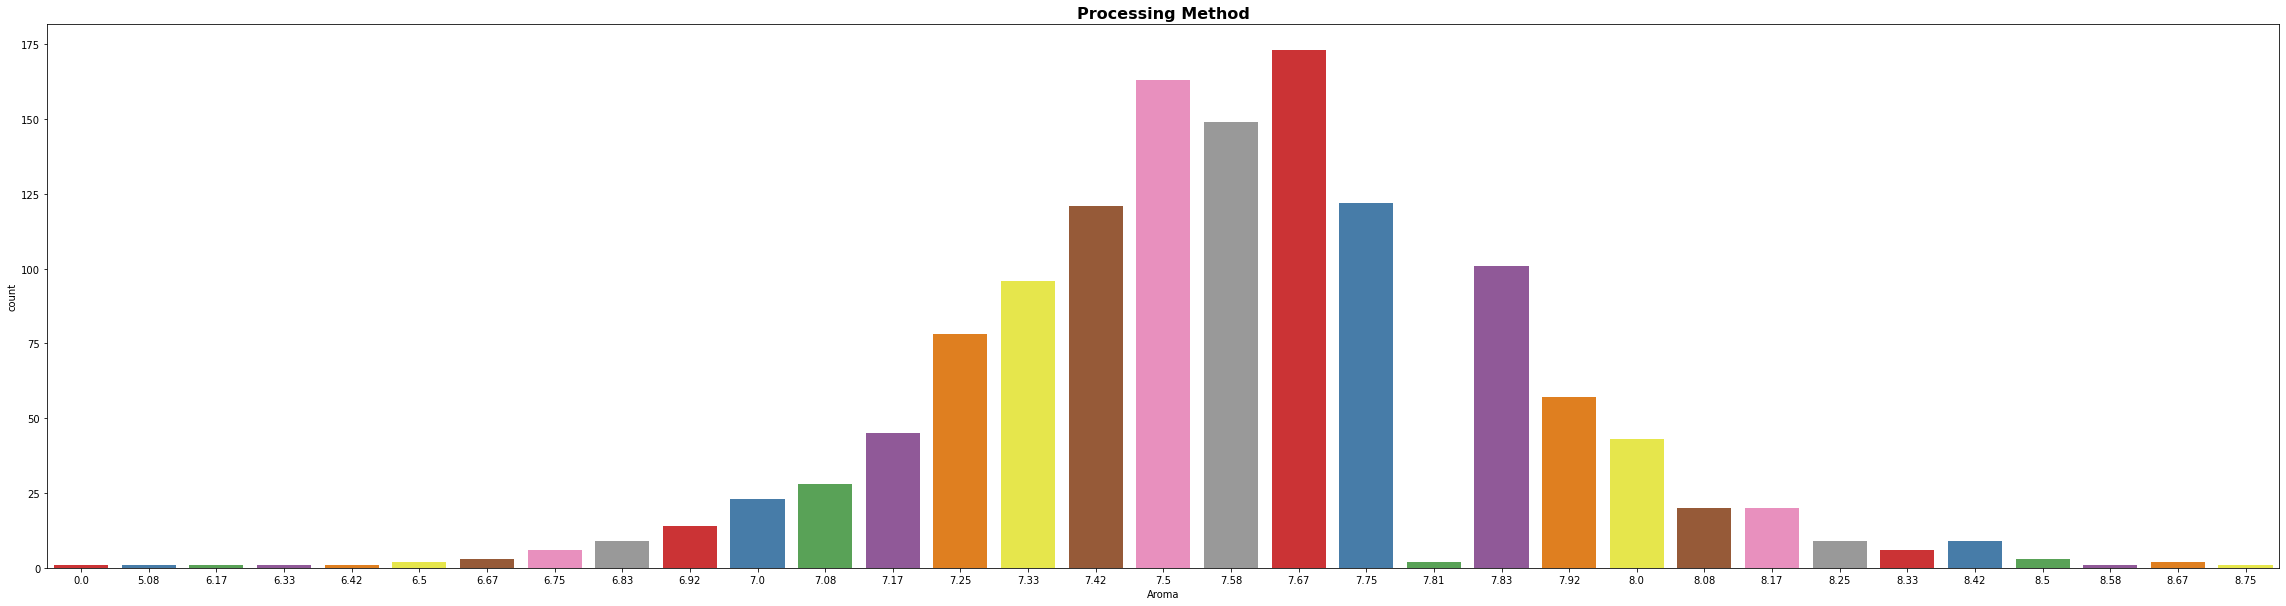

In [191]:
plt.figure(figsize=(40,10))
sns.countplot(df['Aroma'], palette="Set1")
plt.title("Processing Method",fontsize=16,fontweight="bold")
plt.show()

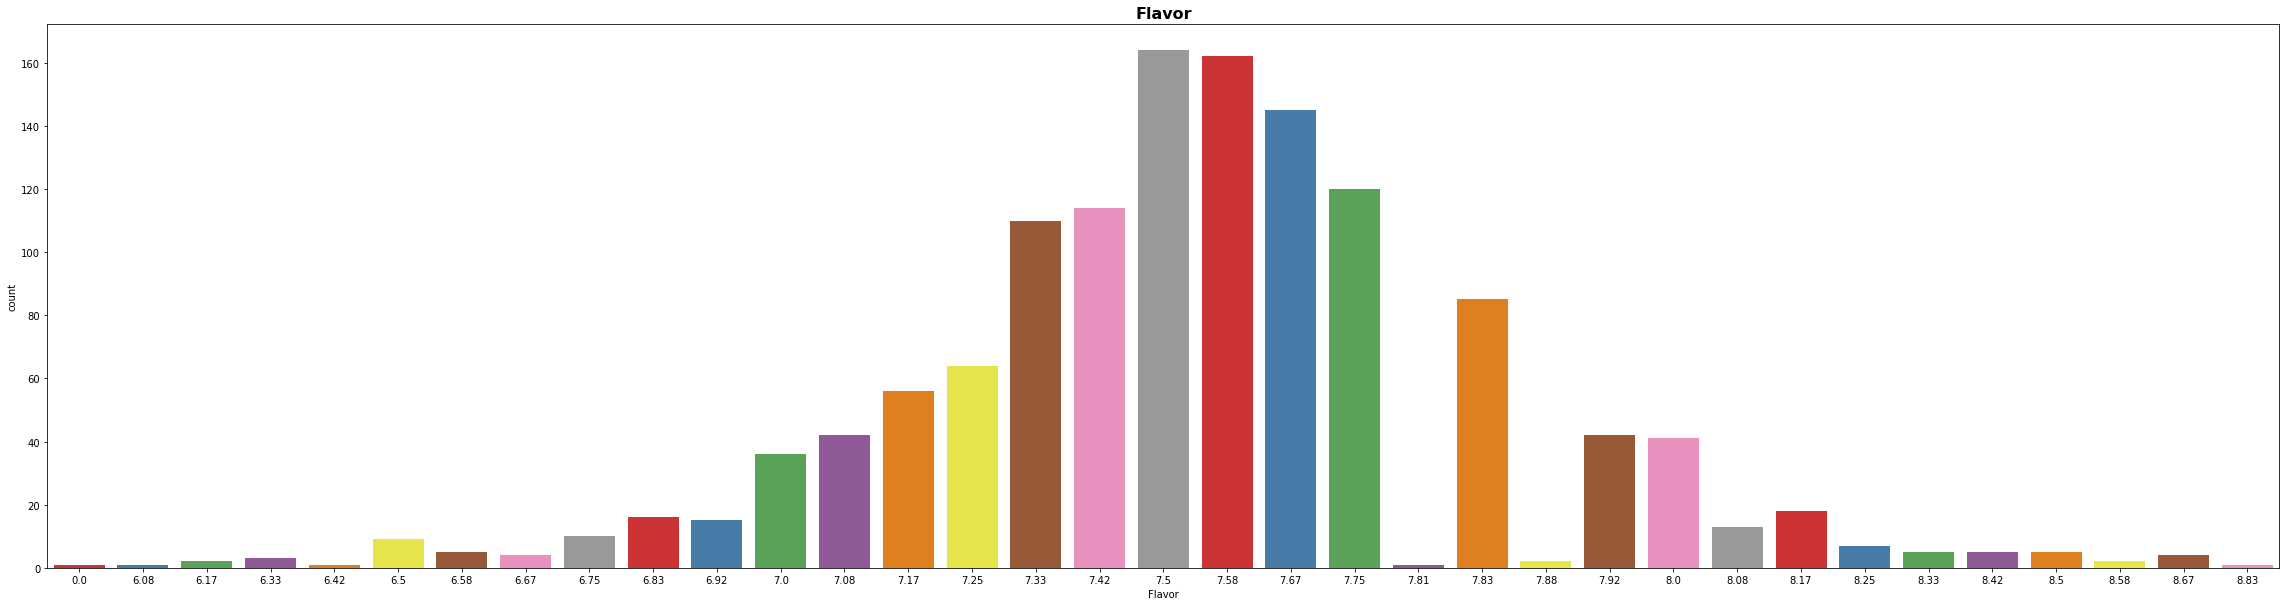

In [192]:
plt.figure(figsize=(40,10))
sns.countplot(df['Flavor'], palette="Set1")
plt.title("Flavor",fontsize=16,fontweight="bold")
plt.show()

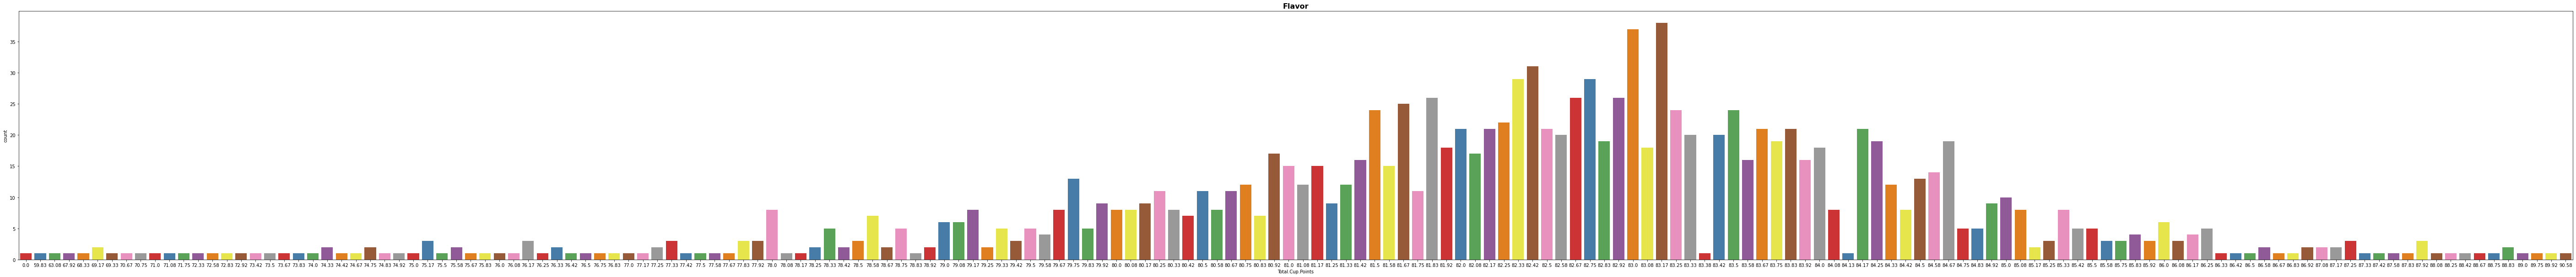

In [193]:
plt.figure(figsize=(100,10))
sns.countplot(df['Total.Cup.Points'], palette="Set1")
plt.title("Flavor",fontsize=16,fontweight="bold")
plt.show()

       Let's look at our heatmap so we will easily see the correlations.

NameError: name 'plotPerColumnDistribution' is not defined

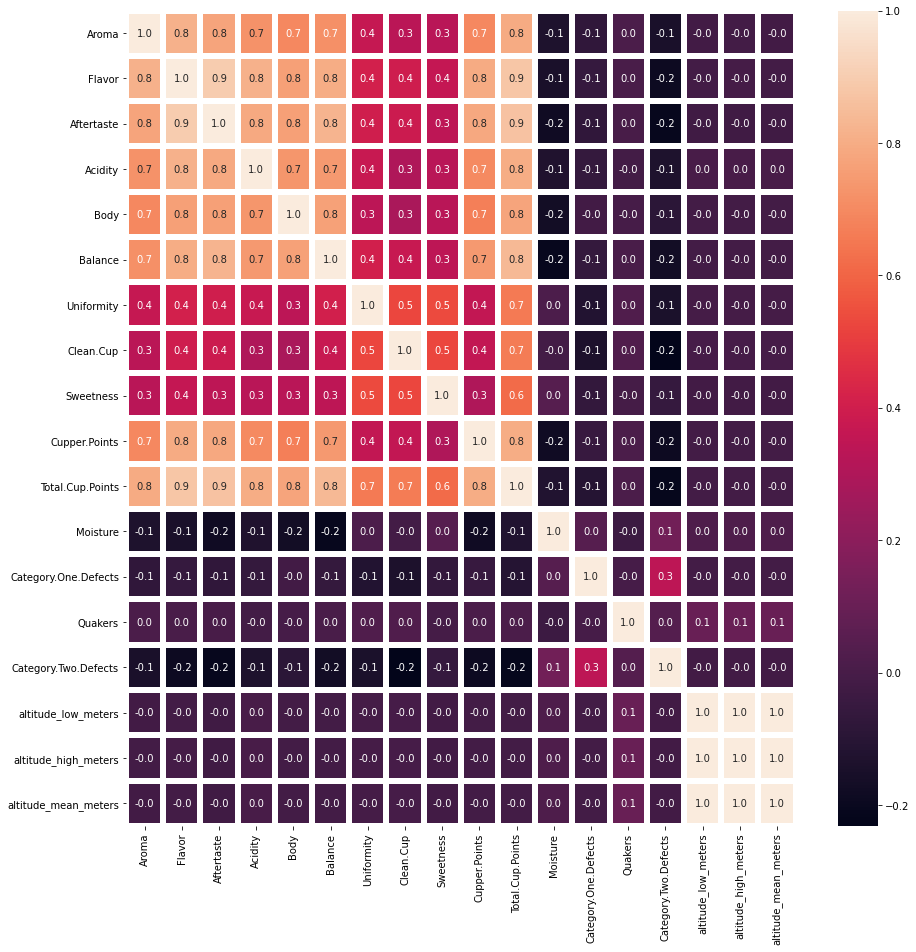

In [199]:
f,ax = plt.subplots(figsize = (15,15))
sns.heatmap(df.corr(), annot = True, linewidth = 5, fmt = ".1f", ax=ax )
plt.show()

# Machine Learning

Soo, Let's clean our data for a linear regression. Using only the most relevant variables

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1311 entries, 1 to 1312
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Species               1311 non-null   object 
 1   Country.of.Origin     1310 non-null   object 
 2   Company               1102 non-null   object 
 3   Region                1254 non-null   object 
 4   Producer              1081 non-null   object 
 5   In.Country.Partner    1311 non-null   object 
 6   Harvest.Year          1264 non-null   object 
 7   Grading.Date          1311 non-null   object 
 8   Owner.1               1304 non-null   object 
 9   Variety               1110 non-null   object 
 10  Processing.Method     1159 non-null   object 
 11  Aroma                 1311 non-null   float64
 12  Flavor                1311 non-null   float64
 13  Aftertaste            1311 non-null   float64
 14  Acidity               1311 non-null   float64
 15  Body                 

In [212]:

# removing unnecessary fields
df1 = df.drop(columns='Species')

df_ml = df1[['Country.of.Origin', 'Variety', 'Aroma','Flavor','Aftertaste','Acidity','Body','Balance','Uniformity','Clean.Cup','Sweetness','Cupper.Points','Processing.Method','Total.Cup.Points']]
df_ml.count()


Country.of.Origin    1310
Variety              1110
Aroma                1311
Flavor               1311
Aftertaste           1311
Acidity              1311
Body                 1311
Balance              1311
Uniformity           1311
Clean.Cup            1311
Sweetness            1311
Cupper.Points        1311
Processing.Method    1159
Total.Cup.Points     1311
dtype: int64

In [213]:
df_ml.isna().sum()

Country.of.Origin      1
Variety              201
Aroma                  0
Flavor                 0
Aftertaste             0
Acidity                0
Body                   0
Balance                0
Uniformity             0
Clean.Cup              0
Sweetness              0
Cupper.Points          0
Processing.Method    152
Total.Cup.Points       0
dtype: int64

In [214]:
nRow, nCol = df_ml.shape
print(f'{nRow} rows {nCol} columns') 

1311 rows 14 columns


In [220]:
#taking out nan values
df_ml = df_ml.dropna()
df_ml = df_ml.reset_index().drop(columns="index")

df_ml.isna().sum()

Country.of.Origin    0
Variety              0
Aroma                0
Flavor               0
Aftertaste           0
Acidity              0
Body                 0
Balance              0
Uniformity           0
Clean.Cup            0
Sweetness            0
Cupper.Points        0
Processing.Method    0
Total.Cup.Points     0
dtype: int64

In [221]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1086 entries, 0 to 1085
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country.of.Origin  1086 non-null   object 
 1   Variety            1086 non-null   object 
 2   Aroma              1086 non-null   float64
 3   Flavor             1086 non-null   float64
 4   Aftertaste         1086 non-null   float64
 5   Acidity            1086 non-null   float64
 6   Body               1086 non-null   float64
 7   Balance            1086 non-null   float64
 8   Uniformity         1086 non-null   float64
 9   Clean.Cup          1086 non-null   float64
 10  Sweetness          1086 non-null   float64
 11  Cupper.Points      1086 non-null   float64
 12  Processing.Method  1086 non-null   object 
 13  Total.Cup.Points   1086 non-null   float64
dtypes: float64(11), object(3)
memory usage: 118.9+ KB


In [223]:
target = df_ml['Total.Cup.Points']


In [227]:
features = df_ml.drop(columns = "Total.Cup.Points")


In [231]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
# this allows plots to appear directly in the notebook
%matplotlib inline

In [ ]:
X = features[['Aroma','Flavor','Aftertaste','Acidity','Body','Balance','Uniformity','Clean.Cup','Sweetness','Cupper.Points']];
y = target;

        We defined our features as all our graded tasting scores, and our target as the Total.Cup.Points varaible.
        
        Cupping coffee is the act of tasting coffee, that why we have a total cup points variable.

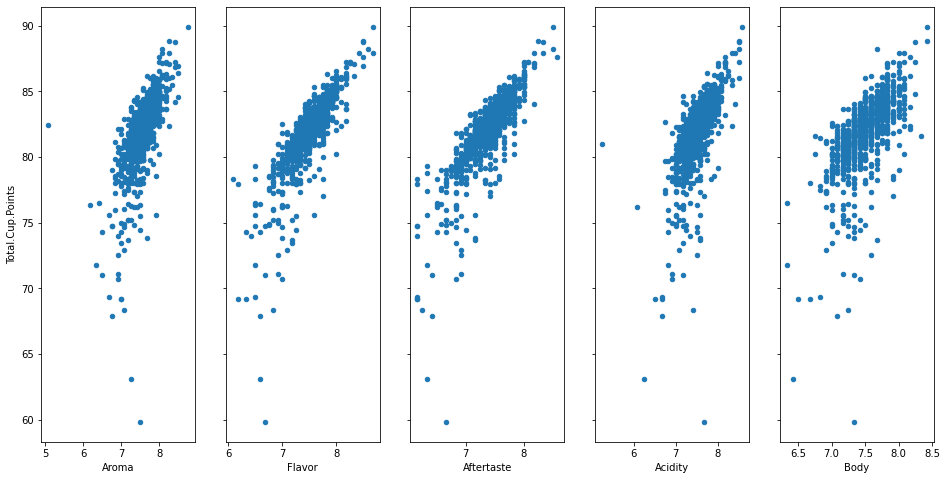

In [238]:
fig, axs = plt.subplots(1, 5, sharey=True)
df_ml.plot(kind='scatter', x='Aroma', y='Total.Cup.Points', ax=axs[0], figsize=(16, 8))
df_ml.plot(kind='scatter', x='Flavor', y='Total.Cup.Points', ax=axs[1])
df_ml.plot(kind='scatter', x='Aftertaste', y='Total.Cup.Points', ax=axs[2])
df_ml.plot(kind='scatter', x='Acidity', y='Total.Cup.Points', ax=axs[3])
df_ml.plot(kind='scatter', x='Body', y='Total.Cup.Points', ax=axs[4])

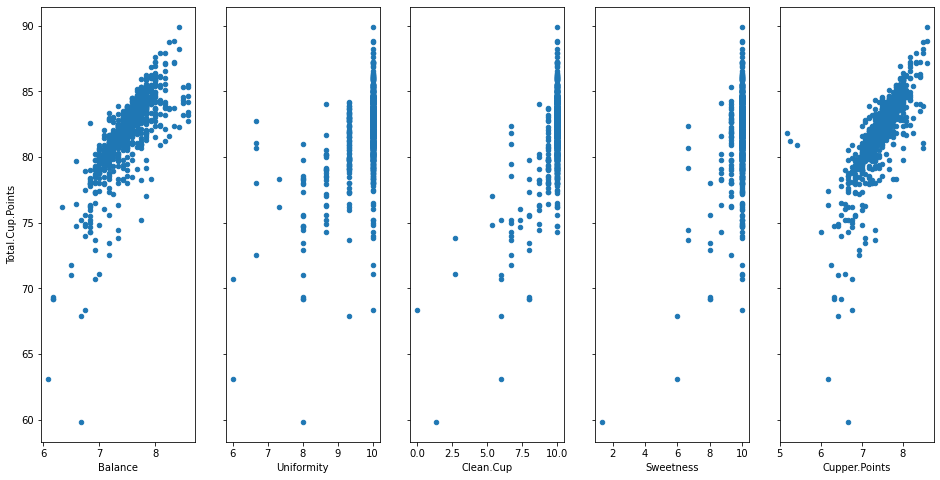

In [239]:
fig, axs = plt.subplots(1, 5, sharey=True)
df_ml.plot(kind='scatter', x='Balance', y='Total.Cup.Points', ax=axs[0], figsize=(16, 8))
df_ml.plot(kind='scatter', x='Uniformity', y='Total.Cup.Points', ax=axs[1])
df_ml.plot(kind='scatter', x='Clean.Cup', y='Total.Cup.Points', ax=axs[2])
df_ml.plot(kind='scatter', x='Sweetness', y='Total.Cup.Points', ax=axs[3])
df_ml.plot(kind='scatter', x='Cupper.Points', y='Total.Cup.Points', ax=axs[4])

        We can see how our data varies from each characterist, let's see how our features will work with our target

In [242]:
linreg = LinearRegression()
linreg.fit(X, y)

print(linreg.intercept_)



-0.03521225795782357


In [243]:
print(linreg.coef_)

[1.0015404  0.99938004 1.00398498 0.99667586 1.00271163 1.00263563
 1.00409309 1.00062358 0.99816373 0.99407143]


The Coefficient for the data

Let's make some test datasets from our dataset

In [232]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(868, 10) (868,)
(218, 10) (218,)


In [233]:
# create model???

lm = linear_model.LinearRegression()

model = lm.fit(X_train, y_train)

In [249]:
predictions = lm.predict(X_test)

Mean squared error: 0.00
Coefficient of determination: 1.00
Coefficients:
Aroma - 1.0013400548987579
Flavor - 1.0009004530291956
Aftertaste - 1.0047398572384532
Acidity - 0.9966998575556603
Body - 1.0031131728687424
Balance - 1.002081796575152
Uniformity - 1.0051681384609652
Clean.Cup - 1.000125281595394
Sweetness - 0.9980241483077323
Cupper.Points - 0.9923400316257154
Score: 0.9999886490364545


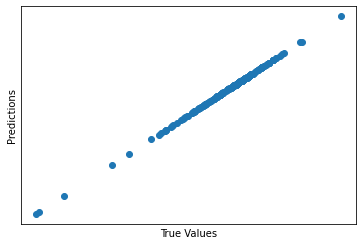

In [253]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, predictions))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, predictions))
# The coefficients
print("Coefficients:")
for x in X_test.columns:
    print(x, "-",lm.coef_[X_test.columns.get_loc(x)])
# Check R^2 Score
print("Score:", model.score(X_test, y_test))

## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

plt.xticks(())
plt.yticks(())

plt.show()